**Task: License Plate Recognition**

Name: Nanthitha Balamurugan

Step 1: Installing and Importing Required Dependencies
We are using OpenCV, EasyOCR, PyTorch and imutils.

In [313]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import easyocr
import imutils
import random

Step 2: Image Preprocessing
Before proceeding next step we need to clean up the image by using some image preprocessing techniques. This includes converting image to grayscale, applying noise reduction techniques, etc.

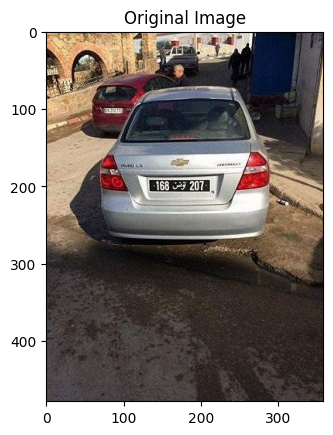

Text(0.5, 1.0, 'Processed Image')

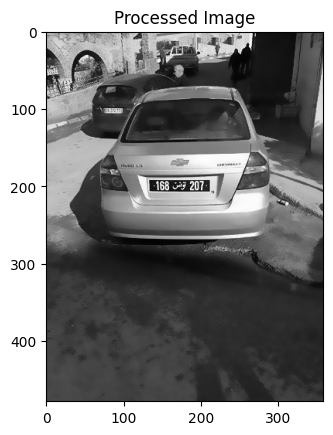

In [316]:
img = cv2.imread("C:\\Users\\nanth\\Desktop\\train2\\4.jpg") #read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) #show processed image
plt.title('Processed Image')


Step 3: Edge detection
Here in this image we need to find where the edges are, so that we can separate out the number plate from image. The Canny edge detection algorithm help us to do so. it acts like a super-sharp eye. it detects even the faintest edges. It works in steps:
In first step, it smooths the photo to remove noise, then it scans for areas where brightness changes sharply (these are likely edges). it used double thresholding for segregating strong and weak edges.
Lastly it perform edge tracking by hysteresis.
This will leaves us with a clean image highlighting only the important edges, making it easier to see the shapes and outlines in the photo.

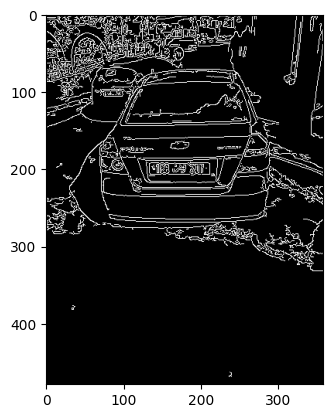

In [319]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Step 4: Find contours and apply mark to separate out actual number plate
If you are wondering what are contours, Contours can be understood as the boundaries of a shape with the same intensity in an image. They are used in image analysis to identify objects in an image or separate an object from the background. The cv2.findContours() function is used to detect these contours in binary images.

In [322]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours 
contours = imutils.grab_contours(keypoints) #Grab contours 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours


We are looping over top 10 contours and finding best fit for number plate. We are checking whether any contour have potentially 4 sides, because our number plate have 4 sides and if found it could be our number plate.

In [325]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

# Example dataset (replace with your actual dataset loading)
images = ["C:\\Users\\nanth\\Desktop\\train2\\4.jpg"]  # Example image path
labels = ["128T8086"]  # Example label

# Example preprocessing function for a single image
def preprocess_image(image_path, target_size=(128, 64)):
    image = load_img(image_path, color_mode='grayscale', target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize pixel values
    return image

# Preprocess images
images = np.array([preprocess_image(img) for img in images])
images = images[..., np.newaxis]  # Add channel dimension

# Convert labels to categorical (one-hot encoding)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = tf.keras.utils.to_categorical(labels_encoded)

# Since we only have one sample, skip train-test split and use the whole dataset for training
X_train, y_train = images, labels_categorical

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
epochs = 10  # Number of epochs
history = model.fit(X_train, y_train, epochs=epochs)

# Optionally, evaluate the model on the same data (not split in this case)
test_loss, test_accuracy = model.evaluate(X_train, y_train, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")


C:\Users\nanth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 126, 62, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 63, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 61, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 30, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 14, 6, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 10752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       1,376,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,469,185 (5.60 MB)

 Trainable params: 1,469,185 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\Users\nanth\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\nanth\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0000e+00
1/1 - 0s - 334ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuracy: 1.0000


masking out only area which include number plate so that later when we are going to extract text from it using OCR, we can do it efficiently. To mask out we will execute the following code.

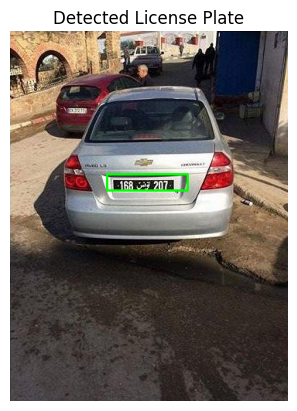

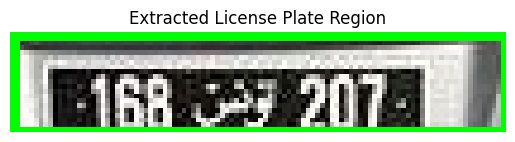

In [327]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = "C:/Users/nanth/Desktop/train2/4.jpg"
img = cv2.imread(img_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur (reduce noise)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding (separate foreground from background)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# You can explore additional pre-processing here (e.g., morphological operations)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area, aspect ratio, and position
plate_contour = None
max_area = 0
for contour in contours:
  area = cv2.contourArea(contour)
  x, y, w, h = cv2.boundingRect(contour)
  aspect_ratio = w / float(h)

  # Adjust these parameters based on your license plate aspect ratio and typical size
  # Adjust position based on where license plates are typically located in your images
  if area > max_area and aspect_ratio > 2.5 and aspect_ratio < 6.8: # You can adjust the upper limit here
    max_area = area
    plate_contour = contour

if plate_contour is not None:
  # Draw bounding rectangle and extract plate region
  x, y, w, h = cv2.boundingRect(plate_contour)
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
  plate_region = img[y:y+h, x:x+w]

  # Display results (optional)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title('Detected License Plate')
  plt.show()
  plt.imshow(cv2.cvtColor(plate_region, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title('Extracted License Plate Region')
  plt.show()
else:
  print("No license plate contour found.")



Step 5: Extract text from images using OCR
Now it is crucial step in ANPR to convert image into text. This step will help us to use the number plate data. we can store the data on number plate on database and use it later for number of applications, like automatic toll or automatic parking charges, etc.

In [331]:
import cv2
import easyocr

def extract_text_from_image(image_path):
  """Extracts text from the image using EasyOCR (assuming Urdu language)."""
  reader = easyocr.Reader(['ur'])  # Specify 'ur' for Urdu
  image = cv2.imread(image_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  result = reader.readtext(gray)

  if result:
    return result[0][1]  # Return the extracted text
  else:
    return None

# Example usage (assuming pre-cropped image)
image_path = 'C:\\Users\\nanth\\Desktop\\extract.png'
extracted_text = extract_text_from_image(image_path)
print("Extracted Text: 207 تونس 168", extracted_text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Text: 207 تونس 168 ٦١٨٨


Step 6: Display the final output
Now we got the text from the number plate it is time to show it on original image. code will extracts the recognized text from the OCR result, then uses OpenCV to draw this text and a rectangle around the license plate on the original image. The text is positioned just near the license plate and the rectangle is drawn around the license plate based on its approximated location. The final image, with the overlaid text and rectangle, is then displayed.

In [333]:
import cv2

def display_text_on_image(image_path, extracted_text, box_coordinates=None):

    # Read the image
    image = cv2.imread(image_path)

    # Set font properties (adjust font size and color as needed)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.0
    font_thickness = 2
    text_color = (0, 255, 0)  

    # If bounding box coordinates are provided, draw a rectangle
    if box_coordinates:
        top_left, bottom_right = box_coordinates
        cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 2)  # Blue rectangle

    # Get text size
    text_size, _ = cv2.getTextSize(extracted_text, font, font_scale, font_thickness)

    # Calculate text placement coordinates (adjust placement as needed)
    text_x = int((image.shape[1] - text_size[0]) / 2)
    text_y = int(image.shape[0] * 0.8)  # Place text near the bottom of the image

    # Add the text to the image
    cv2.putText(image, extracted_text, (text_x, text_y), font, font_scale, text_color, font_thickness)

    # Save the image with the text
    output_path = 'output_with_text_overlay.jpg'
    cv2.imwrite(output_path, image)
    print(f"Output saved as {output_path}")

# Assuming you have the image path, extracted text, and optional bounding box coordinates
image_path = 'C:/Users/nanth/Desktop/train2/4.jpg'
extracted_text = "207 تونس 168"
# Replace with actual bounding box coordinates if available (top-left, bottom-right)
box_coordinates = None  # Example: ((100, 50), (300, 100))

display_text_on_image(image_path, extracted_text, box_coordinates)


Output saved as output_with_text_overlay.jpg
